In [3]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow
You should consider upgrading via the 'c:\users\fab\appdata\local\programs\python\python39-32\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip list

Package            Version
------------------ -----------
asttokens          3.0.0
colorama           0.4.6
comm               0.2.2
debugpy            1.8.9
decorator          5.1.1
exceptiongroup     1.2.2
executing          2.1.0
importlib-metadata 8.5.0
ipykernel          6.29.5
ipython            8.18.1
jedi               0.19.2
jupyter-client     8.6.3
jupyter-core       5.7.2
matplotlib-inline  0.1.7
nest-asyncio       1.6.0
packaging          24.2
parso              0.8.4
pip                20.2.3
platformdirs       4.3.6
prompt-toolkit     3.0.48
psutil             6.1.0
pure-eval          0.2.3
pygments           2.18.0
python-dateutil    2.9.0.post0
pywin32            308
pyzmq              26.2.0
setuptools         49.2.1
six                1.16.0
stack-data         0.6.3
tornado            6.4.2
traitlets          5.14.3
typing-extensions  4.12.2
wcwidth            0.2.13
zipp               3.21.0


You should consider upgrading via the 'c:\users\fab\appdata\local\programs\python\python39-32\python.exe -m pip install --upgrade pip' command.


In [5]:
import tensorflow as tf
import os

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
import cv2
import imghdr

C:\Users\fab\AppData\Local\Temp\ipykernel_5052\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Original Images
PermissionError: [Errno 13] Permission denied: 'data\\Original Images\\Banana Black Sigatoka Disease'

Inner folders: ['Original Images']


In [97]:
data_dir_outer = 'Banana Disease Recognition Dataset'
print(os.listdir(data_dir_outer))
inner_folders = os.listdir(data_dir_outer)
data_dir=os.listdir(os.path.join(data_dir_outer, inner_folders[0]))
files = os.listdir(os.path.join(data_dir_outer, inner_folders[0], data_dir[0]))
print(files)

['Augmented images', 'Original Images']
['Augmented Banana Black Sigatoka Disease', 'Augmented Banana Bract Mosaic Virus Disease', 'Augmented Banana Healthy Leaf', 'Augmented Banana Insect Pest Disease', 'Augmented Banana Moko Disease', 'Augmented Banana Panama Disease', 'Augmented Banana Yellow Sigatoka Disease']


In [77]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
# for image_class in os.path.join(data_dir_outer, inner_folders[0], data_dir[0]): 
#     print(image_class)
    # for image in os.listdir(os.path.join(data_dir, image_class)):

B
a
n
a
n
a
 
D
i
s
e
a
s
e
 
R
e
c
o
g
n
i
t
i
o
n
 
D
a
t
a
s
e
t
\
A
u
g
m
e
n
t
e
d
 
i
m
a
g
e
s
\
A
u
g
m
e
n
t
e
d
 
i
m
a
g
e
s


In [98]:
for image_class in os.listdir(os.path.join(data_dir_outer, inner_folders[0], data_dir[0])): 
    print(image_class)
    for image in os.listdir(os.path.join(data_dir_outer, inner_folders[0], data_dir[0], image_class)):
        image_path = os.path.join(data_dir_outer, inner_folders[0], data_dir[0], image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))



Augmented Banana Black Sigatoka Disease
Augmented Banana Bract Mosaic Virus Disease
Augmented Banana Healthy Leaf
Augmented Banana Insect Pest Disease
Augmented Banana Moko Disease
Augmented Banana Panama Disease
Augmented Banana Yellow Sigatoka Disease


In [42]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [99]:
import numpy as np
from matplotlib import pyplot as plt

In [100]:
data = tf.keras.utils.image_dataset_from_directory('Banana Disease Recognition Dataset')

Found 3264 files belonging to 2 classes.


In [101]:
data_iterator = data.as_numpy_iterator()

In [102]:
batch = data_iterator.next()

In [103]:
batch[0].shape

(32, 256, 256, 3)

In [104]:
batch[1]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

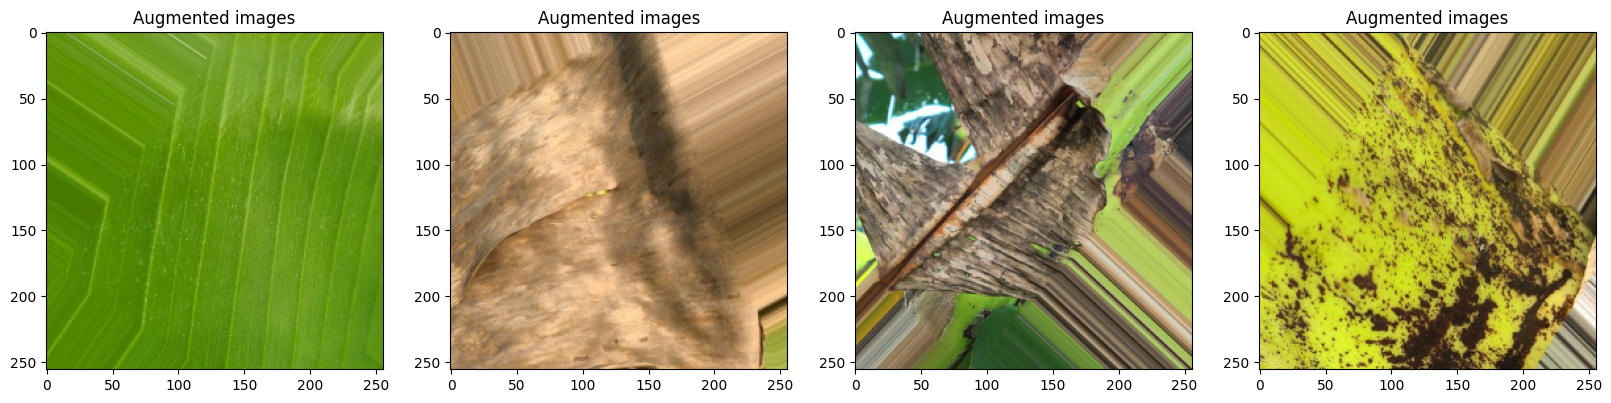

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(data.class_names[batch[1][idx]])
